In [22]:
# Import the required packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string

epochs = 10000
learning_rate = 0.01

random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (3.0, 3.0)

In [23]:
training = pd.read_csv("intro_to_ann.csv")
mti, mtl = np.array(training.ix[:,0:2]), np.array(training.ix[:,2:3])
#plt.scatter(mti[:,0], mti[:,1], s=40, c=mtl, cmap=plt.cm.BuGn)
print(mti.shape, mtl.shape)

(500, 2) (500, 1)


In [24]:
x = tf.placeholder(tf.float32, [None, 2])
Wh = tf.Variable(tf.random_normal([2, 6]))
W = tf.Variable(tf.random_normal([2,6]))
bh = tf.Variable(tf.random_normal([6]))
b = tf.Variable(tf.zeros([1]))
y = tf.nn.softmax(tf.add(tf.matmul(x, W) , b))
#hidden_layer = tf.nn.softmax(tf.add(tf.matmul(x, Wh), bh))
#y = tf.nn.softmax(tf.matmul(hidden_layer, W))
y_= tf.placeholder(tf.float32,[None,1])

In [25]:
# Define loss and optimizer
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
init = tf.initialize_all_variables()
errors=[]
with tf.Session() as sess:
        sess.run(init)
        for i in range(epochs):
            #batch_xs, batch_ys = training.next_batch(100)
            batch_xs = mti
            batch_ys = mtl
            _, cross_entropy_value, y_value = sess.run([optimizer, cross_entropy, y], feed_dict={x: batch_xs, y_: batch_ys})
            accuracy_value = sess.run(accuracy, feed_dict={x: mti, y_: mtl})
            errors.append(1-accuracy_value)
        print (accuracy_value)
        

0.0


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


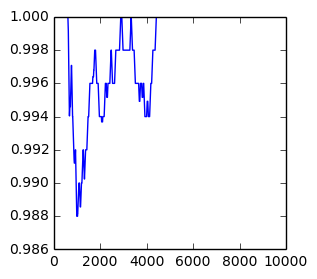

In [27]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()